<a href="https://colab.research.google.com/github/suksk/Machine-learning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]

194

In [5]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
print(train_labels)

[9 0 0 ... 3 0 5]


In [8]:
train_labels.shape

(60000,)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankleboot']

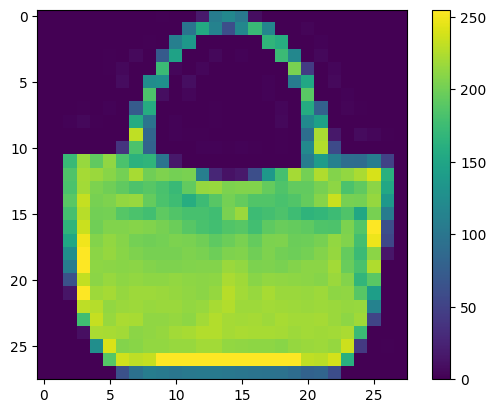

In [13]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
print(train_labels[100])

8


In [16]:
# Data Pre-processing
train_images = train_images/255.0
test_images = test_images/255.0

In [18]:
# Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
# Compiling the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [20]:
# Training the model
model.fit(
    train_images, train_labels,
    epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 2ms/step - loss: 0.4963 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3726 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3337 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3092 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2772 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9021
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2544 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2443 - accuracy: 0.9092
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test accuracy: ',test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8840
Test accuracy:  0.8840000033378601


313/313 [==============================] - 0s 2ms/step
Ankleboot


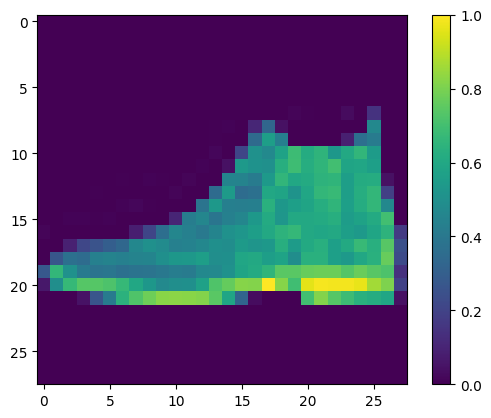

In [28]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 67
1/1 [==============================] - 0s 21ms/step


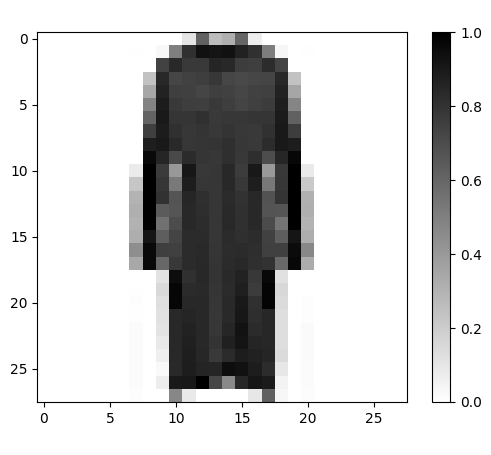

In [34]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
